In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [24]:
import numpy as np
import pandas as pd

### 1. importing data

In [25]:
data = pd.read_csv("amazon_alexa.tsv",sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### 2. getting data ready

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [27]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [28]:
data['label'] = data['rating'].apply(lambda c: 'pos' if c>=3 else 'neg')
data.head()

,rating,date,variation,verified_reviews,feedback,label
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,pos
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,pos
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,pos
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,pos
4,5,31-Jul-18,Charcoal Fabric,Music,1,pos


### 3.performing text mining

In [31]:
data['scores'] = data['verified_reviews'].apply(lambda verified_reviews: sia.polarity_scores(verified_reviews))
data.head()

,rating,date,variation,verified_reviews,feedback,label,scores
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,pos,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'comp..."
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,pos,"{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'comp..."
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,pos,"{'neg': 0.102, 'neu': 0.784, 'pos': 0.114, 'co..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,pos,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [32]:
data['compound'] = data['scores'].apply(lambda scores: scores['compound'])
data.head()

,rating,date,variation,verified_reviews,feedback,label,scores,compound
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,pos,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'comp...",0.6696
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,pos,"{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'comp...",0.6360
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,pos,"{'neg': 0.102, 'neu': 0.784, 'pos': 0.114, 'co...",-0.1280
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,pos,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp...",0.9169
4,5,31-Jul-18,Charcoal Fabric,Music,1,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [33]:
data['compound_score'] = data['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
data.head()

,rating,date,variation,verified_reviews,feedback,label,scores,compound,compound_score
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,pos,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'comp...",0.6696,pos
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,pos,"{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'comp...",0.6360,pos
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,pos,"{'neg': 0.102, 'neu': 0.784, 'pos': 0.114, 'co...",-0.1280,neg
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,pos,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp...",0.9169,pos
4,5,31-Jul-18,Charcoal Fabric,Music,1,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


### 4. checking accuracy score

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
accuracy_score(data['label'],data['compound_score'])

0.9079365079365079

In [36]:
print(classification_report(data['label'],data['compound_score']))

              precision    recall  f1-score   support

         neg       0.43      0.37      0.40       257
         pos       0.94      0.96      0.95      2893

    accuracy                           0.91      3150
   macro avg       0.69      0.66      0.67      3150
weighted avg       0.90      0.91      0.91      3150



In [37]:
print(confusion_matrix(data['label'],data['compound_score']))

[[  96  161]
 [ 129 2764]]


### 5. word cloud

In [70]:
from PIL import Image
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

In [71]:
data_list = list(data['verified_reviews'])
  
# converting list into string and then joining it with space
reviews = ' '.join(str(e) for e in data_list)

print(reviews)

Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I've purchased. I'm working on get

In [72]:
#removing unwanted symbols incase if exists

ip_rev_string = reviews

ip_rev_string = re.sub("[^A-Za-z]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9]+"," ",ip_rev_string)

ip_rev_string

'love my echo loved it sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home i have had a lot of fun with this thing my yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well music i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can t wait to see what else it can do without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use it is a great alarm if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep her it is fun to ask random questions to hear her response she does not seem to be very smartbon politics yet i think this is the th one i ve purchased i m working on getting one in every room of my

In [73]:
ip_reviews_words = ip_rev_string.split(" ")                           #making list of ip_rev_string

In [74]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\backpacker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")

In [76]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

In [77]:
ip_rev_string = " ".join(ip_reviews_words)
ip_rev_string

'love echo loved sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well music received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else without cellphone cannot use many features ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random questions hear response seem smartbon politics yet think th one purchased working getting one every room house really like features offer specifily playing music echos controlling lights throughout house looks great love listened songs heard since childhood get news weather information great sent year old dad talks constantly love learning knew things eveyday still figuring everything works far easy use understand make laugh times purchased mother knee problems give something trying com

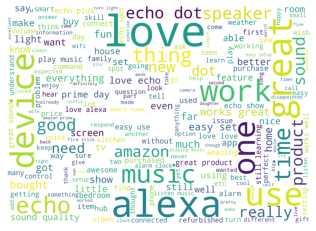

In [78]:
maskarray = np.array(Image.open("butterfly.png"))
cloud = WordCloud(background_color = "white", max_words = 200, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(ip_rev_string)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [79]:
#separating positive words

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")

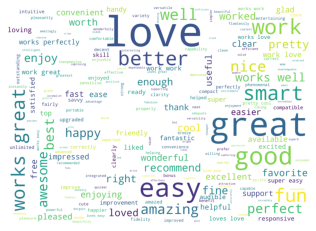

In [80]:
#positive word word cloud
ip_pos_in_pos = " ".join([w for w in ip_reviews_words if w in poswords])

maskarray = np.array(Image.open("butterfly.png"))
cloud = WordCloud(background_color = "white", max_words = 200, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(ip_pos_in_pos)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [81]:
#separating negative words

with open("negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")

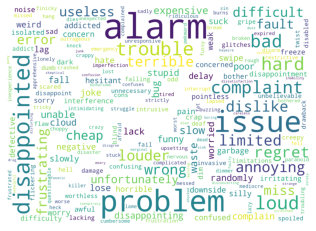

In [82]:
#negative word cloud
ip_neg_in_neg = " ".join([w for w in ip_reviews_words if w in negwords])

maskarray = np.array(Image.open("butterfly.png"))
cloud = WordCloud(background_color = "white", max_words = 200, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(ip_neg_in_neg)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [83]:
len(ip_pos_in_pos)

40675

In [84]:
len(ip_neg_in_neg)

9881

In [85]:
len(ip_reviews_words)

39179

In [87]:
#so overall amazon alexa has good reviews